## Notebook general description:

This notebook data comes from kaggle in the titanic competition: [dataset](https://www.kaggle.com/c/titanic/data)

The author got some reference from the work of Manav and Freeman: [Manva's work](https://www.kaggle.com/startupsci/titanic-data-science-solutions); [LDFreeman](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)

The data was divided into 2 separate training and testing set with the aims to predict the Survived status of the passengers in their destiny trip

## The workflow is introduced as follow:
1. Data introduction
2. Problem introduction and gathering the data
3. Data wrangling and cleaning
4. Model, predict and solve the problem.
5. Evaluating the performance
6. Improving the prediction accuracy 



# Data introduction:
> [Titanic problem](https://www.kaggle.com/c/titanic/overview) is one of the most popular and basic datasets for Machine Learning. The competition's target is simple as using Machine Learning model to predict the survived status of passengers in the Titanic shipwreck. The training data include 12 variable with 891 observations to classify the survival rate.

The sinking of the Titanic is one of the most infamous shipwrecks in history. And it's describe specifically as follow:

-On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

-While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

-In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Variable note:
- Survival: 0 mean not alive, 1 mean yes 
- Pclass: Ticket class with 1st, 2nd and 3th class
- Sex: gender
- Age: Age in that year
- sibsp: the number of sibling/spouse on the ship 
- parch the number of parents/ child aboard on the ship
- Ticket: Ticket number 
- Fare: Passenger fare 
- Cabin: cabin number 
- embarked : port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# Problem introduction and data gathering

> The goals of this work is clearly pointed out as create the best model to predict the accuracy rate survived of the passengers. The problem can easily classified as supervised study with classification problems (binary 0-1 result)

- To achived the target i will firstly do EDA (exploratory data analysis) to understand generally dataset
- Cleaning and wranling data used to build Machine Learning Model
- As the number of obs in this case is quite limited so it's most convenient to use traditional machine learning method instead of deep learning method. Evaluating machine learning model by Cross Validation: Logistic Regression, Random Forst, Support Vector Machine, K-nearest Neighbor. Afterwards, I chose the best performance model to try some tuning parameter to optimize the result

The datasets can be download here [Titanic dataset](https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno # check missing value

from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

sns.set_style('whitegrid')

In [2]:
#Data Import
df_train = pd.read_csv("D:/titanic/train.csv")
df_test = pd.read_csv("D:/titanic/test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


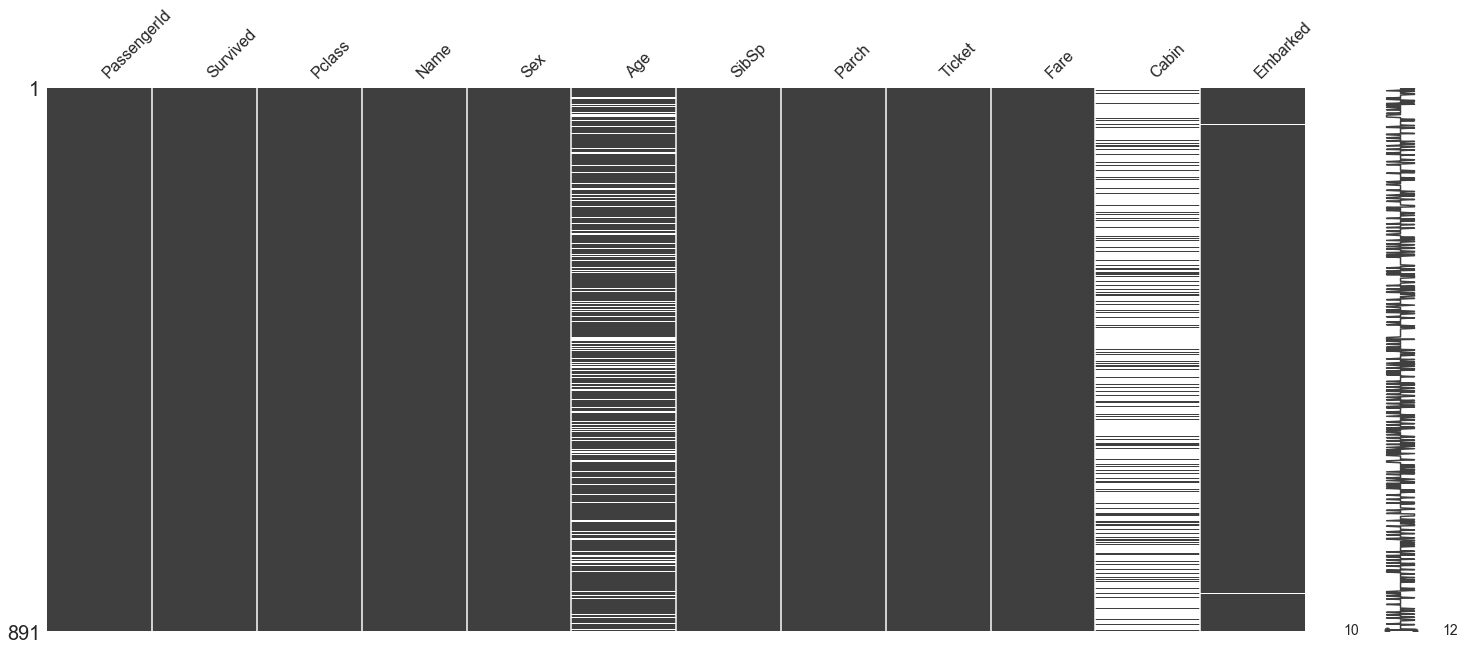

In [5]:
msno.matrix(df_train) # check how the missing data is vary

## From here recognize some general information and how to deal with each variable:

- Cabin variable include a lot of missing data (drop)
- Age variable include around 160 data and data vary randomly so we can solve this by mean-fillin 
- Pclass is categorical data which includes 3 different unique value, and we need to create 2 columns dummies
- Sex variable include 2 unique value which is male and female: change them to binary with 0-1 value
- Embarked similarly with 3 value. create 2 dummies and 2 missing observation will also be removed
- PassengerId, Name, Ticket number will also be removed 

In [6]:
df_train.drop( columns = ['PassengerId', 'Name','Ticket','Cabin'], inplace = True) # drop unneccessary columns
df_test.drop( columns = ['PassengerId', 'Name','Ticket','Cabin'], inplace = True) # drop unneccessary columns

In [7]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean() # see

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
df_train['Sex'] = df_train['Sex'].map( {'female': 1, 'male': 0} )
df_test['Sex'] = df_test['Sex'].map( {'female': 1, 'male': 0} )
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


In [9]:
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [10]:
dummy = pd.get_dummies(df_train['Embarked'])
dummy.drop(columns = 'S', inplace = True)

dummy_test = pd.get_dummies(df_test['Embarked'])
dummy_test.drop(columns ='S', inplace = True)

In [11]:
df_train['Age'].fillna(value = df_train['Age'].mean(), inplace = True) # we fillin the missing value  in Age columns by mean
df_test['Age'].fillna(value = df_test['Age'].mean(), inplace = True)
df_train.dropna(inplace = True) # delete 3 left missing value in Embarked
df_test.dropna(inplace = True)

In [12]:
df = pd.concat([df_train, dummy], axis=1, sort=False) # add dummy back to DataFrame 
df_test = pd.concat([df_test,dummy_test], axis = 1, sort = False)
df.drop(columns = 'Embarked', inplace = True)
df_test.drop(columns ='Embarked', inplace = True)
df.dropna(inplace = True)
df_test.dropna(inplace = True)
df.head() # now the data is ready to analyze 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,0,0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,1,0
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,0,0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,0,0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,0,0


In [13]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,3.0,0.0,34.5,0.0,0.0,7.8292,0,1
1,3.0,1.0,47.0,1.0,0.0,7.0000,0,0
2,2.0,0.0,62.0,0.0,0.0,9.6875,0,1
3,3.0,0.0,27.0,0.0,0.0,8.6625,0,0
4,3.0,1.0,22.0,1.0,1.0,12.2875,0,0


In [14]:
df.head() #data checking 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q
0,0.0,3.0,0.0,22.0,1.0,0.0,7.2500,0,0
1,1.0,1.0,1.0,38.0,1.0,0.0,71.2833,1,0
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,0,0
3,1.0,1.0,1.0,35.0,1.0,0.0,53.1000,0,0
4,0.0,3.0,0.0,35.0,0.0,0.0,8.0500,0,0


# Now the data is ready to analyze 

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
X = df.drop(columns = 'Survived').values
y = df['Survived'].values

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =0) 

In [17]:
MLN = [LogisticRegression(),
    DecisionTreeClassifier(),
    LinearSVC(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    BaggingClassifier(),
    GaussianNB(),
    KNeighborsClassifier()]

MLN_columns = ['MLN Name', 'MLN Parameters', 'MLN Accuracy Mean']
MLN_compare = pd.DataFrame(columns = MLN_columns)

In [18]:
row_index = 0

for i in MLN:
    MLN_name = i.__class__.__name__
    ML = i
    cv_result = cross_val_score(ML, X,y, cv = 5)
    print("The model {} has prediction percentage as :".format(MLN_name), cv_result.mean())
    MLN_compare.loc[row_index, 'MLN Name'] = i.__class__.__name__
    MLN_compare.loc[row_index, 'MLN Parameters'] = str(i.get_params())
    MLN_compare.loc[row_index, 'MLN Accuracy Mean'] = cv_result.mean()
    row_index += 1

The model LogisticRegression has prediction percentage as : 0.7919380435472609
The model DecisionTreeClassifier has prediction percentage as : 0.7750650669713706
The model LinearSVC has prediction percentage as : 0.7030216466704755
The model SVC has prediction percentage as : 0.6727036120104107
The model RandomForestClassifier has prediction percentage as : 0.8009141115977908
The model AdaBoostClassifier has prediction percentage as : 0.8054148416174696
The model BaggingClassifier has prediction percentage as : 0.8132863581540024
The model GaussianNB has prediction percentage as : 0.7750714149685775
The model KNeighborsClassifier has prediction percentage as : 0.6974354091284201


In [19]:
MLN_compare.sort_values(by = 'MLN Accuracy Mean', ascending= False, inplace = True)
MLN_compare # summary the result among model with default parameters

,MLN Name,MLN Parameters,MLN Accuracy Mean
6,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.813286
5,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.805415
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.800914
0,LogisticRegression,"{'C': 1.0, 'class_weight': None, 'dual': False...",0.791938
7,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.775071
1,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.775065
2,LinearSVC,"{'C': 1.0, 'class_weight': None, 'dual': True,...",0.703022
8,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.697435
3,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.672704


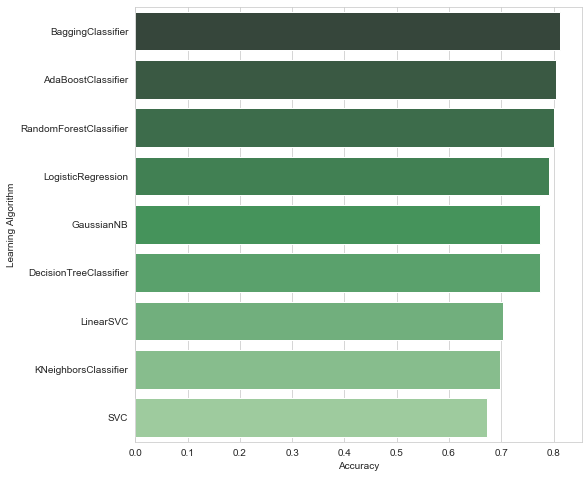

In [20]:
plt.figure(figsize= (8,8))
sns.barplot(x = 'MLN Accuracy Mean', y = 'MLN Name', data = MLN_compare, palette= 'Greens_d')
plt.xlabel('Accuracy')
plt.ylabel('Learning Algorithm')
plt.show()

### We already go through multiple machine learning model with default parameters. But the target of ML is to build a model in which we can maximize the prediction rate. So I try to tunning some parameters in each model to see whether the accuracy rate can be improved.

In [21]:
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)

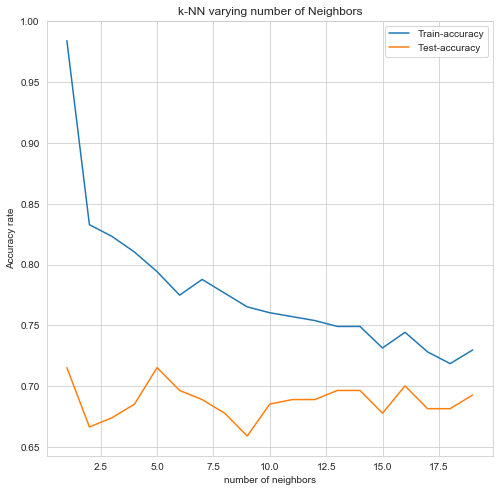

In [22]:
plt.figure(figsize=(8,8))
plt.title('k-NN varying number of Neighbors')
plt.plot(neighbors, train_accuracy, label = 'Train-accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test-accuracy')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy rate')
plt.show()

We can see that the number of neighbors that most balance the training and testing is when n = 14 and the testing accuracy is around 70% which is quite low. Now let's move to Logistic regression and see how can we tune parameter

>Logistic regression tuning base on 2 parameter which is C parameter and regulalization l1 and l2. Reference can be see here [Tuning Logistic regression](https://www.bogotobogo.com/python/scikit-learn/scikit-learn_logistic_regression.php)

In [23]:
# Create param grid.
C_param_range = [0.001,0.01,0.1,1,10,100]
penalty = ['l1','l2']
accuracy_train = []
accuracy_test = []

for i in penalty:
    for z in C_param_range:
        lr = LogisticRegression(penalty = i, C = z,random_state = 0)
        lr.fit(X_train,y_train)
        accuracy_train.append(lr.score(X_train,y_train))
        accuracy_test.append(lr.score(X_test,y_test))

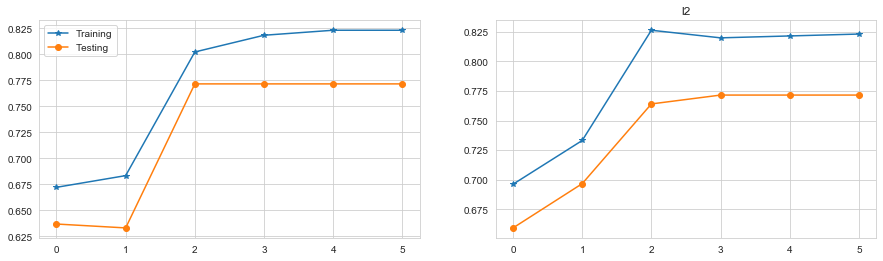

In [24]:
plt.figure(figsize = (15,4))
plt.title('l1')
plt.subplot(1,2,1)
plt.plot(accuracy_train[:6], '-*', label = 'Training')
plt.plot(accuracy_test[:6], '-o', label = 'Testing')
plt.legend()

plt.subplot(1,2,2)
plt.title('l2')
plt.plot(accuracy_train[6:], '-*', label = 'Training')
plt.plot(accuracy_test[6:], '-o', label = 'Testing')
plt.show()

Here we can see the result of logistic regression is a little bit increase to 82.5% for training setand 77.5% for testing set compare to 80% of the default parameters 

In [35]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv = 5)
grid_search.fit(X, y)
grid_search.best_params_
grid_search.best_score_

0.7559055118110236

Again we can see a significantly increase in SVC method by tuning parameters in SVC model. I will continue to explain parameters in each model and continue with other method in the next update

# Last update 22/01/2020

## Reference:

https://www.kaggle.com/startupsci/titanic-data-science-solutions

https://www.kaggle.com/c/titanic/overview